In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout,Activation,BatchNormalization
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/label.csv')
df = shuffle(df)
df.head()

,age,ethnicity,gender,img_name,pixels
21443,65,2,1,20170112224125018.jpg.chip.jpg,86 86 70 48 43 31 27 28 33 41 71 93 106 117 12...
5051,24,0,0,20170116215532270.jpg.chip.jpg,21 35 57 51 61 77 76 81 84 92 119 125 132 133 ...
13881,35,1,0,20170117130104546.jpg.chip.jpg,45 45 64 67 106 139 147 151 149 155 154 153 15...
11796,31,1,1,20170113012024246.jpg.chip.jpg,27 25 24 21 19 19 21 21 22 29 37 54 74 87 103 ...
7814,26,0,1,20170117173639429.jpg.chip.jpg,62 66 76 83 86 92 92 86 86 82 83 103 107 120 1...


In [4]:
num_pixels = len(df['pixels'][0].split(" "))
img_height = int(np.sqrt(len(df['pixels'][0].split(" "))))
img_width = int(np.sqrt(len(df['pixels'][0].split(" "))))
print(num_pixels, img_height, img_width)

2304 48 48


In [5]:
df['pixels'] = df['pixels'].apply(lambda x: np.array(x.split(),dtype='float32'))

In [7]:
X = np.array(df['pixels'].tolist())
X = np.reshape(X, (-1, 48, 48,1))

In [10]:
y = df['ethnicity']
X_train_ethnicity, X_test_ethnicity, y_train_ethnicity, y_test_ethnicity = train_test_split(X, y, test_size=0.3, random_state=44)

In [11]:
train_generator_ethnicity =train_datagen.flow(
    X_train_ethnicity ,y_train_ethnicity ,batch_size=64
)

test_generator_ethnicity =test_datagen.flow(
    X_test_ethnicity ,y_test_ethnicity ,batch_size=64
)

In [12]:
model_ethnicity = Sequential()

model_ethnicity.add(Conv2D(16,(3,3), padding='same',activation='relu',input_shape=(48,48,1)))
model_ethnicity.add(MaxPooling2D(2,2))

model_ethnicity.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model_ethnicity.add(MaxPooling2D(2,2))

model_ethnicity.add(Conv2D(64,(3,3), padding='same',activation='relu'))
model_ethnicity.add(MaxPooling2D(2,2))


model_ethnicity.add(Flatten())
model_ethnicity.add(Dense(128,activation='relu'))


model_ethnicity.add(Dense(5,activation='softmax'))

model_ethnicity.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_ethnicity.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0

In [13]:
model_ethnicity.fit(
    train_generator_ethnicity,
    epochs= 10,
    validation_data= test_generator_ethnicity,
    callbacks= callbacks
)

Epoch 1/10
260/260 [==============================] - ETA: 0s - loss: 1.1805 - accuracy: 0.5478

260/260 [==============================] - 48s 177ms/step - loss: 1.1805 - accuracy: 0.5478 - val_loss: 0.9450 - val_accuracy: 0.6579 - lr: 0.0010
Epoch 2/10
260/260 [==============================] - ETA: 0s - loss: 0.8729 - accuracy: 0.6901

260/260 [==============================] - 48s 183ms/step - loss: 0.8729 - accuracy: 0.6901 - val_loss: 0.8323 - val_accuracy: 0.7125 - lr: 0.0010
Epoch 3/10
260/260 [==============================] - ETA: 0s - loss: 0.7679 - accuracy: 0.7302

260/260 [==============================] - 45s 171ms/step - loss: 0.7679 - accuracy: 0.7302 - val_loss: 0.7765 - val_accuracy: 0.7303 - lr: 0.0010
Epoch 4/10
260/260 [==============================] - ETA: 0s - loss: 0.7016 - accuracy: 0.7553

260/260 [==============================] - 47s 180ms/step - loss: 0.7016 - accuracy: 0.7553 - val_loss: 0.7163 - val_accuracy: 0.7518 - lr: 0.0010
Epoch 5/10
259/260 [============================>.] - ETA: 0s - loss: 0.6577 - accuracy: 0.7697

260/260 [==============================] - 46s 178ms/step - loss: 0.6573 - accuracy: 0.7698 - val_loss: 0.7121 - val_accuracy: 0.7454 - lr: 0.0010
Epoch 6/10
260/260 [==============================] - ETA: 0s - loss: 0.6222 - accuracy: 0.7830

260/260 [==============================] - 45s 174ms/step - loss: 0.6222 - accuracy: 0.7830 - val_loss: 0.6810 - val_accuracy: 0.7589 - lr: 0.0010
Epoch 7/10
260/260 [==============================] - ETA: 0s - loss: 0.5845 - accuracy: 0.7974

260/260 [==============================] - 46s 178ms/step - loss: 0.5845 - accuracy: 0.7974 - val_loss: 0.6756 - val_accuracy: 0.7604 - lr: 0.0010
Epoch 8/10
260/260 [==============================] - ETA: 0s - loss: 0.5490 - accuracy: 0.8075

260/260 [==============================] - 48s 186ms/step - loss: 0.5490 - accuracy: 0.8075 - val_loss: 0.6768 - val_accuracy: 0.7652 - lr: 0.0010
Epoch 9/10
260/260 [==============================] - ETA: 0s - loss: 0.5200 - accuracy: 0.8182

260/260 [==============================] - 48s 184ms/step - loss: 0.5200 - accuracy: 0.8182 - val_loss: 0.6622 - val_accuracy: 0.7702 - lr: 0.0010
Epoch 10/10
260/260 [==============================] - ETA: 0s - loss: 0.4850 - accuracy: 0.8309

260/260 [==============================] - 46s 175ms/step - loss: 0.4850 - accuracy: 0.8309 - val_loss: 0.6859 - val_accuracy: 0.7589 - lr: 0.0010


<Axes: title={'center': 'Ethnicity'}>

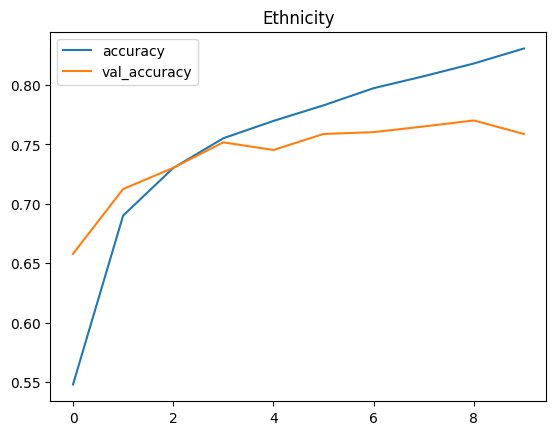

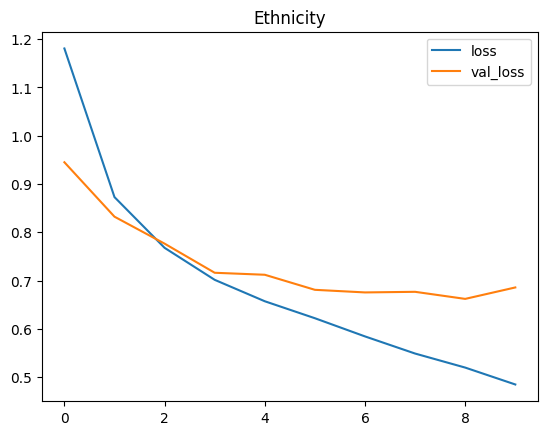

In [14]:
losses_ethnicity = pd.DataFrame(model_ethnicity.history.history)
losses_ethnicity[['accuracy','val_accuracy']].plot(title='Ethnicity')
losses_ethnicity[['loss','val_loss']].plot(title='Ethnicity')


In [23]:
model_ethnicity.save('my_model.h5')

In [19]:
from keras.preprocessing import image

In [24]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/my_model.h5')

In [15]:
# Function to predict ethnicity of uploaded image
def predict_ethnicity(image_path):
    img = image.load_img(image_path, target_size=(48, 48), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    ethnicity_labels = ["White", "Black", "Asian", "Indian", "Hispanic"]
    predicted_ethnicity = ethnicity_labels[np.argmax(prediction)]
    return predicted_ethnicity

In [25]:
# Example usage:
image_path = '/content/1_0_3_20170104230640081.jpg.chip.jpg'
predicted_ethnicity = predict_ethnicity(image_path)
print("Predicted ethnicity:", predicted_ethnicity)

1/1 [==============================] - 0s 124ms/step
Predicted ethnicity: Indian
